# SECOND RESEARCH HYPOTHESIS

## 1 INSTALLING PACKAGES AND SETTING UP ENVIRONMENT

In [ ]:
!ls

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz
!ls -alt

sample_data
--2023-05-13 16:04:07--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  28.4MB/s    in 11s     

2023-05-13 16:04:18 (26.3 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292368
drwxr-xr-x  1 root root      4096 May 13 16:04 .
drwxr-xr-x  1 root root      4096 May 13 16:02 ..
drwxr-xr-x  1 root root      4096 May 11 16:35 sample_data
drwxr-xr-x  4 root root      4096 May 11 16:34 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 1000      4096 Feb 10 20:40 spark-3.3.2-bin-hadoop3


In [ ]:
!pip3 install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# Spark is started. 2 cores used:
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# Importing pyspark SQL for queries: 
from pyspark.sql import *
from pyspark.sql.functions import *

# Spark Session is started: 
# "SparkSession" and "sc" are key handles in to Spark API
##SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName("ride2").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## 2 LOADING DATASETS

In [ ]:
# The initial datasets used here are the same as the first research hypothesis.
!wget https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
!unzip cyclehireusagestats-2014.zip

--2023-05-13 16:30:13--  https://cycling.data.tfl.gov.uk/usage-stats/cyclehireusagestats-2014.zip
Resolving cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)... 104.16.101.13, 104.16.100.13
Connecting to cycling.data.tfl.gov.uk (cycling.data.tfl.gov.uk)|104.16.101.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225215129 (215M) [application/zip]
Saving to: ‘cyclehireusagestats-2014.zip’

cyclehireusagestats 100%[===================>] 214.78M   137MB/s    in 1.6s    

2023-05-13 16:30:15 (137 MB/s) - ‘cyclehireusagestats-2014.zip’ saved [225215129/225215129]

Archive:  cyclehireusagestats-2014.zip
  inflating: 1. Journey Data Extract 05Jan14-02Feb14.csv  
  inflating: 10a. Journey Data Extract 14Sep14-27Sep14.csv  
  inflating: 10b. Journey Data Extract 28Sep14-11Oct14.csv  
  inflating: 11a. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 11b. Journey Data Extract 12Oct14-08Nov14.csv  
  inflating: 12a. Journey Data Extract 09Nov14-06Dec14.csv  
  i

In [ ]:
#An additional dataset from a different dataset is required to be joined with the current dataset to test the second research hypothesis.
!wget https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q3Q4.zip
!unzip Divvy_Stations_Trips_2014_Q3Q4.zip

--2023-05-13 16:32:28--  https://divvy-tripdata.s3.amazonaws.com/Divvy_Stations_Trips_2014_Q3Q4.zip
Resolving divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)... 52.217.38.124, 52.216.213.209, 52.217.173.41, ...
Connecting to divvy-tripdata.s3.amazonaws.com (divvy-tripdata.s3.amazonaws.com)|52.217.38.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30838872 (29M) [application/zip]
Saving to: ‘Divvy_Stations_Trips_2014_Q3Q4.zip’

Divvy_Stations_Trip 100%[===================>]  29.41M  76.8MB/s    in 0.4s    

2023-05-13 16:32:29 (76.8 MB/s) - ‘Divvy_Stations_Trips_2014_Q3Q4.zip’ saved [30838872/30838872]

Archive:  Divvy_Stations_Trips_2014_Q3Q4.zip
 extracting: Divvy_Stations_Trips_2014_Q3Q4/Divvy_Stations_2014_Q3Q4.zip  
  inflating: Divvy_Stations_Trips_2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv  
  inflating: Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv  
  inflating: Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-0809.csv  

##3 LOADING AND ANALYSING CHICAGO DATASET

For framing the second research hypothesis the new dataset needs to be loaded and analysed. The data@DivvyBikes.com provides the boke rides data of Chicago.

In [ ]:
file_path = "Divvy_Stations_Trips_2014_Q3Q4/README.txt"
file_rdd = spark.read.text(file_path).rdd
file_lines = file_rdd.collect()
for line in file_lines:
    print(line)

Row(value='This file contains metadata for both the Trips and Stations table.')
Row(value='')
Row(value='For more information, visit http://DivvyBikes.com/data or email questions to data@DivvyBikes.com. ')
Row(value='')
Row(value='')
Row(value='Metadata for Trips Table:')
Row(value='')
Row(value='Variables:')
Row(value='')
Row(value='trip_id: ID attached to each trip taken')
Row(value='starttime: day and time trip started, in CST')
Row(value='stoptime: day and time trip ended, in CST')
Row(value='bikeid: ID attached to each bike')
Row(value='tripduration: time of trip in seconds ')
Row(value='from_station_name: name of station where trip originated')
Row(value='to_station_name: name of station where trip terminated ')
Row(value='from_station_id: ID of station where trip originated')
Row(value='to_station_id: ID of station where trip terminated')
Row(value='usertype: "Customer" is a rider who purchased a 24-Hour Pass; "Subscriber" is a rider who purchased an Annual Membership')
Row(valu

In [ ]:
!ls

'10a. Journey Data Extract 14Sep14-27Sep14.csv'
'10b. Journey Data Extract 28Sep14-11Oct14.csv'
'11a. Journey Data Extract 12Oct14-08Nov14.csv'
'11b. Journey Data Extract 12Oct14-08Nov14.csv'
'12a. Journey Data Extract 09Nov14-06Dec14.csv'
'12b. Journey Data Extract 09Nov14-06Dec14.csv'
'13a. Journey Data Extract 07Dec14-21Dec14.csv'
'13b. Journey Data Extract 22Dec14-03Jan15.csv'
'14. Journey Data Extract 08Dec13-04Jan14.csv'
'1. Journey Data Extract 05Jan14-02Feb14.csv'
'2. Journey Data Extract 03Feb14-01Mar14.csv'
'3. Journey Data Extract 02Mar14-31Mar14.csv'
'4. Journey Data Extract 01Apr14-26Apr14.csv'
'5. Journey Data Extract 27Apr14-24May14.csv'
'6. Journey Data Extract 25May14-21Jun14.csv'
'7. Journey Data Extract 22Jun14-19Jul14.csv'
'8a Journey Data Extract 20Jul14-31Jul14.csv'
'8b Journey Data Extract 01Aug14-16Aug14.csv'
'9a Journey Data Extract 17Aug14-31Aug14.csv'
'9b Journey Data Extract 01Sep14-13Sep14.csv'
 cyclehireusagestats-2014.zip
 Divvy_Stations_Trips_2014_Q3Q4
 

In [ ]:
#changing the directory to the unzipped folder to retrieve the data
!cd Divvy_Stations_Trips_2014_Q3Q4

In [ ]:
!pwd

/content


In [ ]:
#The basic details of the dataset is available in the readme file. For more details regarding the dates and characteristics of data available lets load and check the dataset.
data1 = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['Divvy_Stations_Trips_2014_Q3Q4']))

In [ ]:
data1.count()

1549363

In [ ]:
data1.show(5)

+-------+---------------+--------------+------+------------+---------------+--------------------+-------------+--------------------+----------+------+---------+
|trip_id|      starttime|      stoptime|bikeid|tripduration|from_station_id|   from_station_name|to_station_id|     to_station_name|  usertype|gender|birthyear|
+-------+---------------+--------------+------+------------+---------------+--------------------+-------------+--------------------+----------+------+---------+
|3810750|9/30/2014 23:59|10/1/2014 0:06|   851|         411|            177| Theater on the Lake|          143|Sedgwick St & Web...|Subscriber|  Male|     1982|
|3810749|9/30/2014 23:59|10/1/2014 0:01|   989|         142|            277|Ashland Ave & Gra...|          285| Wood St & Grand Ave|Subscriber|  Male|     1983|
|3810748|9/30/2014 23:59|10/1/2014 0:03|   261|         279|             48|Larrabee St & Kin...|          110|  State St & Erie St|Subscriber|  Male|     1988|
|3810746|9/30/2014 23:58|10/1/2014

In [ ]:
data1.printSchema()

root
 |-- trip_id: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_id: integer (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)



In [ ]:
#spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
spark.sql("set spark.sql.legacy.timeParserPolicy=LEGACY")

DataFrame[key: string, value: string]

In [ ]:
 #creating a dataframe with only required columns
#Chicago = data1.select(col("trip_id").alias("Id"), col("starttime").alias("startTime"), col("tripduration").alias("Duration"))
from pyspark.sql import functions as fn
Chicago = data1.select(fn.to_timestamp(col("starttime"), \
                                                format="M/dd/yyyy HH:mm").alias("Starttime"), col("tripduration").alias("Duration"), col("trip_id").alias("Id"))

In [ ]:
Chicago.printSchema()

root
 |-- Starttime: timestamp (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Id: string (nullable = true)



In [ ]:
Chicago.show(5)

+-------------------+--------+-------+
|          Starttime|Duration|     Id|
+-------------------+--------+-------+
|2014-09-30 23:59:00|     411|3810750|
|2014-09-30 23:59:00|     142|3810749|
|2014-09-30 23:59:00|     279|3810748|
|2014-09-30 23:58:00|    1031|3810746|
|2014-09-30 23:58:00|     437|3810745|
+-------------------+--------+-------+
only showing top 5 rows



In [ ]:
#Removing the duplicates
Chicago1 = Chicago.drop_duplicates()
print(Chicago.count(),Chicago1.count())

1549363 1549362


The count after deduplicating has changed means the data had duplicates.

In [ ]:
#Lets check the min and maximum dates available in the dataset
Chicago1.agg({"starttime": "min"}).show()
Chicago1.agg({"starttime": "max"}).show()

+-------------------+
|     min(starttime)|
+-------------------+
|2014-07-01 00:16:00|
+-------------------+

+-------------------+
|     max(starttime)|
+-------------------+
|2014-12-31 23:54:00|
+-------------------+



The data from 1 July'14 - 31 December'14 is available in the Chicago dataset.

In [ ]:
#Check for missing values autumn columns
null_Chicago_Id = Chicago1.where(col("Id").isNull()).count()
null_Chicago_starttime= Chicago1.where(col("starttime").isNull()).count()
null_Chicago_Duration = Chicago1.where(col("Duration").isNull()).count()
print(null_Chicago_Id, null_Chicago_starttime, null_Chicago_Duration)

0 427 127


In [ ]:
#Removing the null rows from the dataset
Chicago2 = Chicago1.na.drop()

## 4 RESEARCH HYPOTHESIS:
<br>Based the analysis of data from Chicago dataset and understanding of data from London dataset which was performed for Research Hypothesis1, formulating the below Reserach Hypothesis.
###"In 2014 September month, the most short Duration rides(<10mins) has happened in Chicago" 

In [ ]:
#Taking the required data from the Chicago dataset
Chicago_sep = Chicago2.filter((Chicago2['Starttime'] >= "2014-09-01 00:00:00") & (Chicago2['Starttime'] < "2014-10-01 00:00:00"))
Chicago_sep.count()

308513

In [ ]:
Chicago_sep.printSchema()

root
 |-- Starttime: timestamp (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Id: string (nullable = true)



In [ ]:
from pyspark.sql.types import IntegerType
Chicago_sep = Chicago_sep.withColumn("Duration", col("Duration").cast(IntegerType()))
Chicago_sep = Chicago_sep.withColumn("Id", col("Id").cast(IntegerType()))

## 5 LOADING AND ANALYSING LONDON DATASET

As per the research hypothesis the data required from the london dataset is September data.
<br>9b 01Sep14-13Sep14.csv
<br>10a. 14Sep14-27Sep14.csv
<br>10b. 28Sep14-11Oct14.csv 

In [ ]:
data2 = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load(['./10a.*csv', './10b.*csv', './9b*csv']))

In [ ]:
data2.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- Start Date: string (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [ ]:
data2.show(10)

+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
|Rental Id|Duration|Bike Id|        End Date|EndStation Id|     EndStation Name|      Start Date|StartStation Id|   StartStation Name| _c9|_c10|_c11|
+---------+--------+-------+----------------+-------------+--------------------+----------------+---------------+--------------------+----+----+----+
| 37875851|     120|   3229|28/09/2014 00:02|          450|Jubilee Street, S...|28/09/2014 00:00|            443|Philpot Street, W...|null|null|null|
| 37875861|    1080|   3283|28/09/2014 00:18|          645|Great Suffolk Str...|28/09/2014 00:00|             14|Belgrove Street ,...|null|null|null|
| 37875857|    2820|  11369|28/09/2014 00:47|          727|Chesilton Road, F...|28/09/2014 00:00|            321|Bermondsey Street...|null|null|null|
| 37875849|    1620|  11362|28/09/2014 00:27|          719|Victoria Park Roa...|28/09/2014 00:00|   

In [ ]:
#Changing the datatype of Start Date column
data2 = data2.withColumn("start Date", to_timestamp("start Date", "dd/MM/yyyy HH:mm"))

In [ ]:
data2.printSchema()

root
 |-- Rental Id: string (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Bike Id: string (nullable = true)
 |-- End Date: string (nullable = true)
 |-- EndStation Id: string (nullable = true)
 |-- EndStation Name: string (nullable = true)
 |-- start Date: timestamp (nullable = true)
 |-- StartStation Id: string (nullable = true)
 |-- StartStation Name: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)



In [ ]:
#Selecting the required date records
london = data2.filter(data2['Start Date'] >= "2014-09-01 00:00:00")\
.filter(data2['Start Date'] < "2014-10-01 00:00:00").select(col("start Date").alias("Starttime"), 
                     col("Duration").alias("Duration"), 
                     col("Rental Id").alias("Id"))
london.count()

1046460

In [ ]:
#Verifying the dates
london.agg({"Starttime": "min"}).show()
london.agg({"Starttime": "max"}).show()

+-------------------+
|     min(Starttime)|
+-------------------+
|2014-09-01 00:00:00|
+-------------------+

+-------------------+
|     max(Starttime)|
+-------------------+
|2014-09-30 23:59:00|
+-------------------+



In [ ]:
#Check for duplicates autumn
london1 = london.drop_duplicates()
print(london.count(), london1.count())

1046460 1046460


There are no duplicates in the dataset.

In [ ]:
#Check for missing values autumn columns
null_london_Id = london1.where(col("Id").isNull()).count()
null_london_starttime= london1.where(col("starttime").isNull()).count()
null_london_Duration = london1.where(col("Duration").isNull()).count()
print(null_london_Id, null_london_starttime, null_london_Duration)

0 0 0


There are no missing values in the data.

In [ ]:
london_sep = london1.withColumn("Duration", col("Duration").cast(IntegerType()))
london_sep = london1.withColumn("Id", col("Id").cast(IntegerType()))

##6 DATA EXPLORATION

In [ ]:
#Lets create a new column in both the dataset mentioning the city
from pyspark.sql.functions import lit
Chicago_sep = Chicago_sep.withColumn("City", lit("Chicago"))
london_sep = london_sep.withColumn("City", lit("London"))

In [ ]:
#Lets create a union of both datasets into one for further analysis
sept = Chicago_sep.union(london_sep)
print(Chicago_sep.count(), london_sep.count(),sept.count())

308513 1046460 1354973


In [ ]:
sept.groupBy("City").agg(count("*").alias("Count")).show()

+-------+-------+
|   City|  Count|
+-------+-------+
|Chicago| 308513|
| London|1046460|
+-------+-------+



FINDING AND REMOVING NOISE

In [ ]:
#The records with Duration <= 0 are noise
Chicago_sep.filter(col('Duration') <= 0).agg(count("*").alias("Count")).show()
london_sep.filter(col('Duration') <= 0).agg(count("*").alias("Count")).show()
sept.filter(col('Duration') <= 0).agg(count("*").alias("Count")).show()

+-----+
|Count|
+-----+
|    0|
+-----+

+-----+
|Count|
+-----+
| 3006|
+-----+

+-----+
|Count|
+-----+
| 3006|
+-----+



In [ ]:
#Removing the noise from london data as chicago data doesnot include any noise data
london_sep = london_sep.filter(col('Duration') > 0)
sept1 = sept.filter(col('Duration') > 0)

In [ ]:
london_sep = london_sep.withColumn("Duration", col("Duration").cast(IntegerType()))

In [ ]:
london_sep.printSchema()

root
 |-- Starttime: timestamp (nullable = true)
 |-- Duration: integer (nullable = true)
 |-- Id: integer (nullable = true)



In [ ]:
#Creating pandas dataframe for plotting purpose
pd_Chicago_sep = Chicago_sep.toPandas()
pd_london_sep = london_sep.toPandas()
pd_sept = sept.toPandas()

In [ ]:
#Creating a sample dataset for data exploration
Chicago_sep_sample=Chicago_sep.sample(0.004)
london_sep_sample=london_sep.sample(0.001)
sept_sample=sept.sample(0.001)
print(Chicago_sep_sample.count(), london_sep_sample.count(), sept_sample.count())

1219 1078 1362


In [ ]:
#Creating a pandas dataframe of the samples for plotting purpose
pd_Chicago_sep_sample=Chicago_sep.sample(0.004).toPandas()
pd_london_sep_sample=london_sep.sample(0.001).toPandas()
pd_sept_sample=sept.sample(0.001).toPandas()

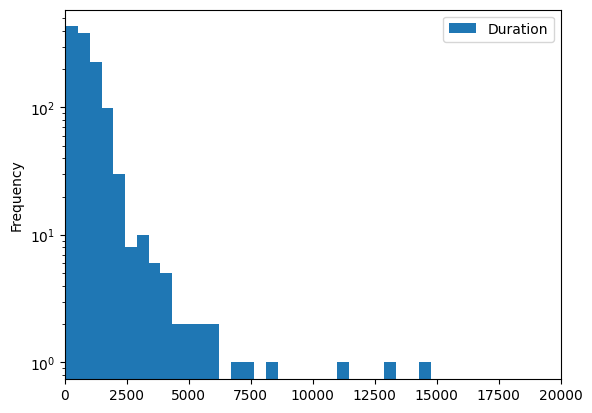

In [ ]:
import matplotlib.pyplot as plt
pd_Chicago_sep_sample[["Duration"]].plot(kind="hist", bins=100, log=True)
plt.xlim(0,20000)
plt.show()

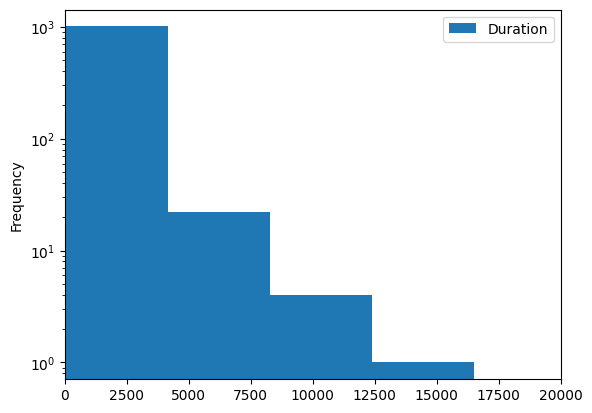

In [ ]:
pd_london_sep_sample[["Duration"]].plot(kind="hist", bins=100, log=True)
plt.xlim(0,20000)
plt.show()

The histogram suggests london data consist of more long duration rides. But short duration rides are of our interest and the histogram suggest more frequency for the short duration rides in the london data.

IDENTYFYING AND REMOVING OUTLIERS

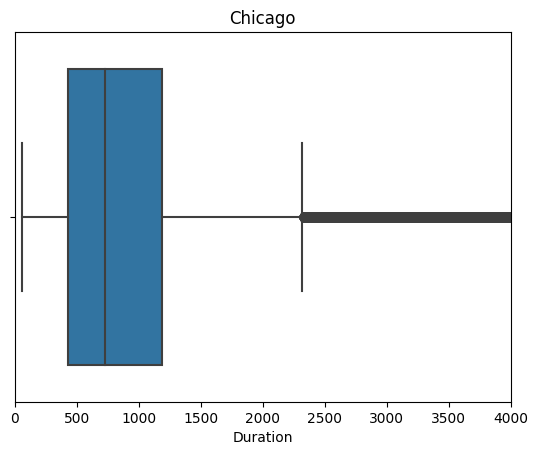

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = pd_Chicago_sep['Duration'])
plt.title('Chicago')
plt.xlim(0,4000)
plt.show()

In [ ]:
#The data above 2400 are outliers hence can be removed
Chicago_sep_final = Chicago_sep.filter(Chicago_sep['Duration'] <= 2400)

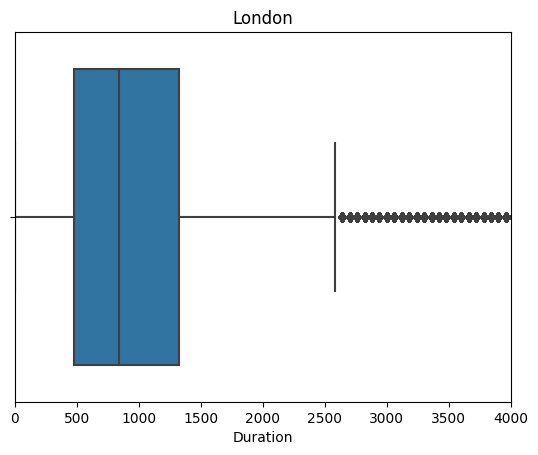

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x = pd_london_sep['Duration'])
plt.title('London')
plt.xlim(0,4000)
plt.show()

In [ ]:
#The data above 2600 are outliers hence can be removed
london_sep_final = london_sep.filter(london_sep['Duration'] <= 2600)

## 7 HYPOTHESIS ANALYSIS

Hypothesis statement: "In 2014 September month, the most short Duration rides(10mins) has happened in Chicago"

In [ ]:
#We are interested in the short duration rides. hence lets subset the short duration rides data
chicago_Short = Chicago_sep_final.filter(Chicago_sep_final['Duration'] <= 600)
london_Short = london_sep_final.filter(london_sep_final['Duration'] <= 600)
sept_Short = sept.filter(sept['Duration'] <= 600)
print(chicago_Short.count(),london_Short.count(),sept_Short.count())

124871 366365 491236


In [ ]:
print(Chicago_sep_final.count(),london_sep_final.count(),sept.count())

296463 982076 1354973


In [ ]:
#Finding the mean of short duration rides grouped by the City column
sept_Short.groupBy("City").agg(avg("Duration").alias("MeanDuration")).show()

+-------+------------------+
|   City|      MeanDuration|
+-------+------------------+
|Chicago| 374.8924169743175|
| London|399.47260245929607|
+-------+------------------+



The mean duration of London is more that Chicago for the Short Duration rides. which means the Short Duration rides is more in London for September month in 2014.

In [ ]:
sept_Short.groupBy("City").agg(sum("Duration").alias("SumDuration")).show()

+-------+-----------+
|   City|SumDuration|
+-------+-----------+
|Chicago|4.6813191E7|
| London|1.4635278E8|
+-------+-----------+



The sum of short durations of London is more than that of Chicago which says the research hypothisis is not true.

Text(0.5, 1.0, 'Shortest Rides in September 2014')

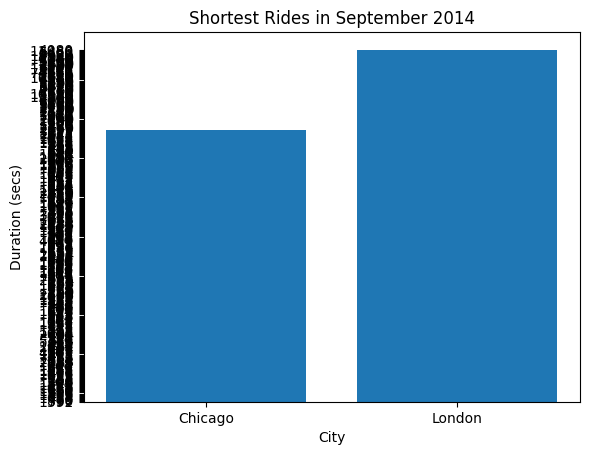

In [ ]:
fig, ax = plt.subplots()
ax.bar(pd_sept_sample['City'], pd_sept_sample['Duration'])
ax.set_xlabel('City')
ax.set_ylabel('Duration (secs)')
ax.set_title('Shortest Rides in September 2014')

The barplot clearly shows that the London has more short duration rides which validates that the research hypothesis is not true.

##8 HYPOTHESIS TESTING

The two sampled T test is used here to validate the results and see if it rejects the Hypothesis as the manual exploration result.

In [ ]:
from numpy.random import seed
from numpy.random import randn
from numpy.random import normal
from scipy.stats import ttest_ind

In [ ]:
#Converting the dataframes to pandas dataframe
pd_chicago_Short = chicago_Short.select('Duration').toPandas()
pd_london_Short = london_Short.select('Duration').toPandas()

In [ ]:
sample1= pd_chicago_Short.sample(1000, random_state=15)
sample2= pd_london_Short.sample(1000, random_state=15)

H₀: In 2014 September month, the most short Duration rides(10mins) has happened in Chicago
<br>H₁: In 2014 September month, the most short Duration rides(10mins) has happened in London

In [ ]:
t_statistic, p_value = ttest_ind(sample1, sample2)
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  [-3.38514817]
p-value:  [0.00072516]


alpha = 0.05
<br>Reject the null hypothesis if p-value <= alpha
<br>Fail to reject the null hypothesis if p-value > alpha

<br>p-value from the test = 0.00072516
<br>p-value < alpha
<br>Hence it rejects the null hypothesis. 
<br>Hence It is again proven that London has more short duration rides.
The research hypothesis "In 2014 September month, the most short Duration rides(10mins) has happened in Chicago" is not true.